In [69]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
data = pd.read_csv('/content/horse.csv')
data

surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0        no  adult           530101         38.5   66.0              28.0   
1       yes  adult           534817         39.2   88.0              20.0   
2        no  adult           530334         38.3   40.0              24.0   
3       yes  young          5290409         39.1  164.0              84.0   
4        no  adult           530255         37.3  104.0              35.0   
..      ...    ...              ...          ...    ...               ...   
294     yes  adult           533886          NaN  120.0              70.0   
295      no  adult           527702         37.2   72.0              24.0   
296     yes  adult           529386         37.5   72.0              30.0   
297     yes  adult           530612         36.5  100.0              24.0   
298     yes  adult           534618         37.2   40.0              20.0   

    temp_of_extremities peripheral_pulse mucous_membrane  \
0                  cool          reduced             NaN   
1                   NaN              NaN   pale_cyanotic   
2                normal           normal       pale_pink   
3                  cold           normal   dark_cyanotic   
4                   NaN              NaN   dark_cyanotic   
..                  ...              ...             ...   
294                cold              NaN   pale_cyanotic   
295                cool        increased   pale_cyanotic   
296                cold          reduced   pale_cyanotic   
297                cool          reduced       pale_pink   
298                 NaN              NaN             NaN   

    capillary_refill_time  ... packed_cell_volume total_protein  \
0              more_3_sec  ...               45.0           8.4   
1              less_3_sec  ...               50.0          85.0   
2              less_3_sec  ...               33.0           6.7   
3              more_3_sec  ...               48.0           7.2   
4              more_3_sec  ...               74.0           7.4   
..                    ...  ...                ...           ...   
294            more_3_sec  ...               55.0          65.0   
295            more_3_sec  ...               44.0           NaN   
296            less_3_sec  ...               60.0           6.8   
297            less_3_sec  ...               50.0           6.0   
298                   NaN  ...               36.0          62.0   

    abdomo_appearance abdomo_protein     outcome  surgical_lesion lesion_1  \
0                 NaN            NaN        died               no    11300   
1              cloudy            2.0  euthanized               no     2208   
2                 NaN            NaN       lived               no        0   
3       serosanguious            5.3        died              yes     2208   
4                 NaN            NaN        died               no     4300   
..                ...            ...         ...              ...      ...   
294               NaN            NaN  euthanized               no     3205   
295     serosanguious            3.3  euthanized              yes     2208   
296               NaN            NaN        died              yes     3205   
297     serosanguious            3.4       lived              yes     2208   
298             clear            1.0  euthanized               no     6112   

    lesion_2  lesion_3  cp_data  
0          0         0       no  
1          0         0       no  
2          0         0      yes  
3          0         0      yes  
4          0         0       no  
..       ...       ...      ...  
294        0         0       no  
295        0         0      yes  
296        0         0       no  
297        0         0      yes  
298        0         0       no  

[299 rows x 28 columns]

In [71]:
data.columns

Index(['surgery', 'age', 'hospital_number', 'rectal_temp', 'pulse',
       'respiratory_rate', 'temp_of_extremities', 'peripheral_pulse',
       'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis',
       'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux',
       'nasogastric_reflux_ph', 'rectal_exam_feces', 'abdomen',
       'packed_cell_volume', 'total_protein', 'abdomo_appearance',
       'abdomo_protein', 'outcome', 'surgical_lesion', 'lesion_1', 'lesion_2',
       'lesion_3', 'cp_data'],
      dtype='object')

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [73]:
data['outcome'].value_counts()

lived         178
died           77
euthanized     44
Name: outcome, dtype: int64

In [74]:
prefix_col = ['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'surgical_lesion', 'cp_data']
dummy_col = ['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'surgical_lesion', 'cp_data']
data = pd.get_dummies(data, prefix = prefix_col, columns = dummy_col)

In [75]:
data['outcome'] = data['outcome'].replace({'died': 1, 'euthanized': 1, 'lived': 0})
data

hospital_number  rectal_temp  pulse  respiratory_rate  \
0             530101         38.5   66.0              28.0   
1             534817         39.2   88.0              20.0   
2             530334         38.3   40.0              24.0   
3            5290409         39.1  164.0              84.0   
4             530255         37.3  104.0              35.0   
..               ...          ...    ...               ...   
294           533886          NaN  120.0              70.0   
295           527702         37.2   72.0              24.0   
296           529386         37.5   72.0              30.0   
297           530612         36.5  100.0              24.0   
298           534618         37.2   40.0              20.0   

     nasogastric_reflux_ph  packed_cell_volume  total_protein  abdomo_protein  \
0                      NaN                45.0            8.4             NaN   
1                      NaN                50.0           85.0             2.0   
2                      NaN                33.0            6.7             NaN   
3                      5.0                48.0            7.2             5.3   
4                      NaN                74.0            7.4             NaN   
..                     ...                 ...            ...             ...   
294                    NaN                55.0           65.0             NaN   
295                    NaN                44.0            NaN             3.3   
296                    NaN                60.0            6.8             NaN   
297                    NaN                50.0            6.0             3.4   
298                    NaN                36.0           62.0             1.0   

     outcome  lesion_1  ...  abdomen_firm  abdomen_normal  abdomen_other  \
0          1     11300  ...             0               0              0   
1          1      2208  ...             0               0              1   
2          0         0  ...             0               1              0   
3          1      2208  ...             0               0              0   
4          1      4300  ...             0               0              0   
..       ...       ...  ...           ...             ...            ...   
294        1      3205  ...             0               0              0   
295        1      2208  ...             0               0              0   
296        1      3205  ...             0               0              0   
297        0      2208  ...             0               0              0   
298        1      6112  ...             0               1              0   

     abdomo_appearance_clear  abdomo_appearance_cloudy  \
0                          0                         0   
1                          0                         1   
2                          0                         0   
3                          0                         0   
4                          0                         0   
..                       ...                       ...   
294                        0                         0   
295                        0                         0   
296                        0                         0   
297                        0                         0   
298                        1                         0   

     abdomo_appearance_serosanguious  surgical_lesion_no  surgical_lesion_yes  \
0                                  0                   1                    0   
1                                  0                   1                    0   
2                                  0                   1                    0   
3                                  1                   0                    1   
4                                  0                   1                    0   
..                               ...                 ...                  ...   
294                                0                   1                    0   
295                          

In [76]:
data.isnull().sum()

hospital_number                      0
rectal_temp                         60
pulse                               24
respiratory_rate                    58
nasogastric_reflux_ph              246
                                  ... 
abdomo_appearance_serosanguious      0
surgical_lesion_no                   0
surgical_lesion_yes                  0
cp_data_no                           0
cp_data_yes                          0
Length: 68, dtype: int64

In [77]:
data.drop(columns = ['nasogastric_reflux_ph'], inplace = True)

In [78]:
data.isnull().sum()

hospital_number                     0
rectal_temp                        60
pulse                              24
respiratory_rate                   58
packed_cell_volume                 29
                                   ..
abdomo_appearance_serosanguious     0
surgical_lesion_no                  0
surgical_lesion_yes                 0
cp_data_no                          0
cp_data_yes                         0
Length: 67, dtype: int64

In [79]:
rectal_temp_mean = data['rectal_temp'].mean()
pulse_mean = data['pulse'].mean()
respiratory_rate_mean = data['respiratory_rate'].mean()
packed_cell_volume_mean = data['packed_cell_volume'].mean()
abdomo_protein_mean = data['abdomo_protein'].mean()

In [80]:
data['rectal_temp'] = data['rectal_temp'].fillna(rectal_temp_mean)
data['pulse'] = data['pulse'].fillna(pulse_mean)
data['respiratory_rate'] = data['respiratory_rate'].fillna(respiratory_rate_mean)
data['packed_cell_volume'] = data['packed_cell_volume'].fillna(packed_cell_volume_mean)
data['abdomo_protein'] = data['abdomo_protein'].fillna(abdomo_protein_mean)

In [ ]:
data

hospital_number  rectal_temp  pulse  respiratory_rate  \
0             530101    38.500000   66.0              28.0   
1             534817    39.200000   88.0              20.0   
2             530334    38.300000   40.0              24.0   
3            5290409    39.100000  164.0              84.0   
4             530255    37.300000  104.0              35.0   
..               ...          ...    ...               ...   
294           533886    38.168619  120.0              70.0   
295           527702    37.200000   72.0              24.0   
296           529386    37.500000   72.0              30.0   
297           530612    36.500000  100.0              24.0   
298           534618    37.200000   40.0              20.0   

     packed_cell_volume  total_protein  abdomo_protein  outcome  lesion_1  \
0                  45.0            8.4        3.039604        1     11300   
1                  50.0           85.0        2.000000        1      2208   
2                  33.0            6.7        3.039604        0         0   
3                  48.0            7.2        5.300000        1      2208   
4                  74.0            7.4        3.039604        1      4300   
..                  ...            ...             ...      ...       ...   
294                55.0           65.0        3.039604        1      3205   
295                44.0            NaN        3.300000        1      2208   
296                60.0            6.8        3.039604        1      3205   
297                50.0            6.0        3.400000        0      2208   
298                36.0           62.0        1.000000        1      6112   

     lesion_2  ...  abdomen_firm  abdomen_normal  abdomen_other  \
0           0  ...             0               0              0   
1           0  ...             0               0              1   
2           0  ...             0               1              0   
3           0  ...             0               0              0   
4           0  ...             0               0              0   
..        ...  ...           ...             ...            ...   
294         0  ...             0               0              0   
295         0  ...             0               0              0   
296         0  ...             0               0              0   
297         0  ...             0               0              0   
298         0  ...             0               1              0   

     abdomo_appearance_clear  abdomo_appearance_cloudy  \
0                          0                         0   
1                          0                         1   
2                          0                         0   
3                          0                         0   
4                          0                         0   
..                       ...                       ...   
294                        0                         0   
295                        0                         0   
296                        0                         0   
297                        0                         0   
298                        1                         0   

     abdomo_appearance_serosanguious  surgical_lesion_no  surgical_lesion_yes  \
0                                  0                   1                    0   
1                                  0                   1                    0   
2                                  0                   1                    0   
3                                  1                   0                    1   
4                                  0                   1                    0   
..                               ...                 ...                  ...   
294                                0                   1                    0   
295                                1                   0                    1   
296                                0                   0                    1   
297                    

In [ ]:
data.isnull().sum()

hospital_number                    0
rectal_temp                        0
pulse                              0
respiratory_rate                   0
packed_cell_volume                 0
                                  ..
abdomo_appearance_serosanguious    0
surgical_lesion_no                 0
surgical_lesion_yes                0
cp_data_no                         0
cp_data_yes                        0
Length: 67, dtype: int64

In [ ]:
data.dropna(inplace = True)

In [ ]:
data

hospital_number  rectal_temp  pulse  respiratory_rate  \
0             530101    38.500000   66.0              28.0   
1             534817    39.200000   88.0              20.0   
2             530334    38.300000   40.0              24.0   
3            5290409    39.100000  164.0              84.0   
4             530255    37.300000  104.0              35.0   
..               ...          ...    ...               ...   
293           533902    38.500000   40.0              16.0   
294           533886    38.168619  120.0              70.0   
296           529386    37.500000   72.0              30.0   
297           530612    36.500000  100.0              24.0   
298           534618    37.200000   40.0              20.0   

     packed_cell_volume  total_protein  abdomo_protein  outcome  lesion_1  \
0                  45.0            8.4        3.039604        1     11300   
1                  50.0           85.0        2.000000        1      2208   
2                  33.0            6.7        3.039604        0         0   
3                  48.0            7.2        5.300000        1      2208   
4                  74.0            7.4        3.039604        1      4300   
..                  ...            ...             ...      ...       ...   
293                37.0           67.0        3.039604        0         0   
294                55.0           65.0        3.039604        1      3205   
296                60.0            6.8        3.039604        1      3205   
297                50.0            6.0        3.400000        0      2208   
298                36.0           62.0        1.000000        1      6112   

     lesion_2  ...  abdomen_firm  abdomen_normal  abdomen_other  \
0           0  ...             0               0              0   
1           0  ...             0               0              1   
2           0  ...             0               1              0   
3           0  ...             0               0              0   
4           0  ...             0               0              0   
..        ...  ...           ...             ...            ...   
293         0  ...             0               0              1   
294         0  ...             0               0              0   
296         0  ...             0               0              0   
297         0  ...             0               0              0   
298         0  ...             0               1              0   

     abdomo_appearance_clear  abdomo_appearance_cloudy  \
0                          0                         0   
1                          0                         1   
2                          0                         0   
3                          0                         0   
4                          0                         0   
..                       ...                       ...   
293                        0                         0   
294                        0                         0   
296                        0                         0   
297                        0                         0   
298                        1                         0   

     abdomo_appearance_serosanguious  surgical_lesion_no  surgical_lesion_yes  \
0                                  0                   1                    0   
1                                  0                   1                    0   
2                                  0                   1                    0   
3                                  1                   0                    1   
4                                  0                   1                    0   
..                               ...                 ...                  ...   
293                                0                   1                    0   
294                                0                   1                    0   
296                                0                   0                    1   
297                    

In [90]:
import pandas as pd

# Load the cleaned dataset
data = pd.DataFrame({
    'hospital_number': [530101, 534817, 530334, 5290409, 530255, 533902, 533886, 529386, 530612, 534618],
    'rectal_temp': [38.5, 39.2, 38.3, 39.1, 37.3, 38.5, 38.168619, 37.5, 36.5, 37.2],
    'pulse': [66.0, 88.0, 40.0, 164.0, 104.0, 40.0, 120.0, 72.0, 100.0, 40.0],
    'respiratory_rate': [28.0, 20.0, 24.0, 84.0, 35.0, 16.0, 70.0, 30.0, 24.0, 20.0],
   
    'outcome': [1, 1, 0, 1, 1, 0, 1, 1, 0, 1]  # Specify the target variable column
})

# Find the unique values in the 'hospital_number' column
unique_hospital_numbers = data['hospital_number'].unique()

# Sort the unique hospital numbers in ascending order
sorted_hospital_numbers = sorted(unique_hospital_numbers)

# Get the first hospital number, which represents the root node
root_node = sorted_hospital_numbers[0]

# Print the root node
print("Root Node:", root_node)


Root Node: 529386


In [91]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

# Load the cleaned dataset
data = pd.DataFrame({
    'hospital_number': [530101, 534817, 530334, 5290409, 530255, 533902, 533886, 529386, 530612, 534618],
    'rectal_temp': [38.5, 39.2, 38.3, 39.1, 37.3, 38.5, 38.168619, 37.5, 36.5, 37.2],
    'pulse': [66.0, 88.0, 40.0, 164.0, 104.0, 40.0, 120.0, 72.0, 100.0, 40.0],
    'respiratory_rate': [28.0, 20.0, 24.0, 84.0, 35.0, 16.0, 70.0, 30.0, 24.0, 20.0],
    # ... Include other columns from the dataset ...
    'outcome': [1, 1, 0, 1, 1, 0, 1, 1, 0, 1]  # Specify the target variable column
})

# Separate features and target variable
X = data.drop(columns=['outcome'])  # Features
y = data['outcome']  # Target variable

# Train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Plot the decision tree
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=['0', '1'], filled=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Save the decision tree to a file
graph.view()  # Display the decision tree


'decision_tree.pdf'

In [ ]:
new_data = data.tail(6)
print(new_data)

     hospital_number  rectal_temp  pulse  respiratory_rate  \
292           534004    38.168619   78.0              24.0   
293           533902    38.500000   40.0              16.0   
294           533886    38.168619  120.0              70.0   
296           529386    37.500000   72.0              30.0   
297           530612    36.500000  100.0              24.0   
298           534618    37.200000   40.0              20.0   

     packed_cell_volume  total_protein  abdomo_protein  outcome  lesion_1  \
292                43.0           62.0        2.000000        1      2209   
293                37.0           67.0        3.039604        0         0   
294                55.0           65.0        3.039604        1      3205   
296                60.0            6.8        3.039604        1      3205   
297                50.0            6.0        3.400000        0      2208   
298                36.0           62.0        1.000000        1      6112   

     lesion_2  ...  abdom

In [ ]:
data = data.head(260)
print(data)

     hospital_number  rectal_temp  pulse  respiratory_rate  \
0             530101         38.5   66.0              28.0   
1             534817         39.2   88.0              20.0   
2             530334         38.3   40.0              24.0   
3            5290409         39.1  164.0              84.0   
4             530255         37.3  104.0              35.0   
..               ...          ...    ...               ...   
286          5305129         39.5   84.0              30.0   
288           529126         38.0   50.0              36.0   
289           535054         38.6   45.0              16.0   
290           528890         38.9   80.0              44.0   
291           530034         37.0   66.0              20.0   

     packed_cell_volume  total_protein  abdomo_protein  outcome  lesion_1  \
0                  45.0            8.4        3.039604        1     11300   
1                  50.0           85.0        2.000000        1      2208   
2                  33.0 

In [ ]:
data['outcome'].value_counts()

0    163
1     97
Name: outcome, dtype: int64

1-ANOVA TEST ( WE HAVE USED OUTCOME AS PRIMARY FEATURE AND SELECTED OTHER FEATURES WHICH COMPLIMENT OUTCOME COLUMN FEATURE)

In [ ]:
from scipy.stats import f_oneway
import pandas as pd

# Assuming the dataset is stored in a pandas DataFrame called 'df'
# Specify the continuous variables for the ANOVA test
continuous_vars = ['rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'total_protein', 'abdomo_protein']

# Perform the ANOVA test
result = f_oneway(*[data[var] for var in continuous_vars], data['outcome'])

# Create a DataFrame to display the ANOVA results
anova_results = pd.DataFrame({'Variable': continuous_vars + ['outcome'],
                              'F-value': result.statistic,
                              'p-value': result.pvalue})

# Print the ANOVA results
print(anova_results)

             Variable     F-value  p-value
0         rectal_temp  606.147471      0.0
1               pulse  606.147471      0.0
2    respiratory_rate  606.147471      0.0
3  packed_cell_volume  606.147471      0.0
4       total_protein  606.147471      0.0
5      abdomo_protein  606.147471      0.0
6             outcome  606.147471      0.0


CHI SQAURED TEST RESULTS

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency



# Select the columns for the chi-square test
columns_for_chi2 = ['rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'total_protein', 'abdomo_protein']

# Create a contingency table for each feature with the outcome column
contingency_tables = []
for column in columns_for_chi2:
    contingency_table = pd.crosstab(data[column], data['outcome'])
    contingency_tables.append(contingency_table)

# Perform the chi-square test for each contingency table
results = []
for contingency_table in contingency_tables:
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    results.append((chi2, p_value))

# Create a DataFrame to display the chi-square test results
chi2_results = pd.DataFrame(results, columns=['Chi-square', 'p-value'], index=columns_for_chi2)

# Print the chi-square test results
print(chi2_results)


                    Chi-square   p-value
rectal_temp          50.128663  0.109191
pulse                86.543591  0.000545
respiratory_rate     49.912899  0.113113
packed_cell_volume   87.278106  0.000864
total_protein        92.019364  0.150065
abdomo_protein       47.309811  0.080004


CREATING HEATMAPS FOR NECESSARY FEATURES PRESENT IN DATASET

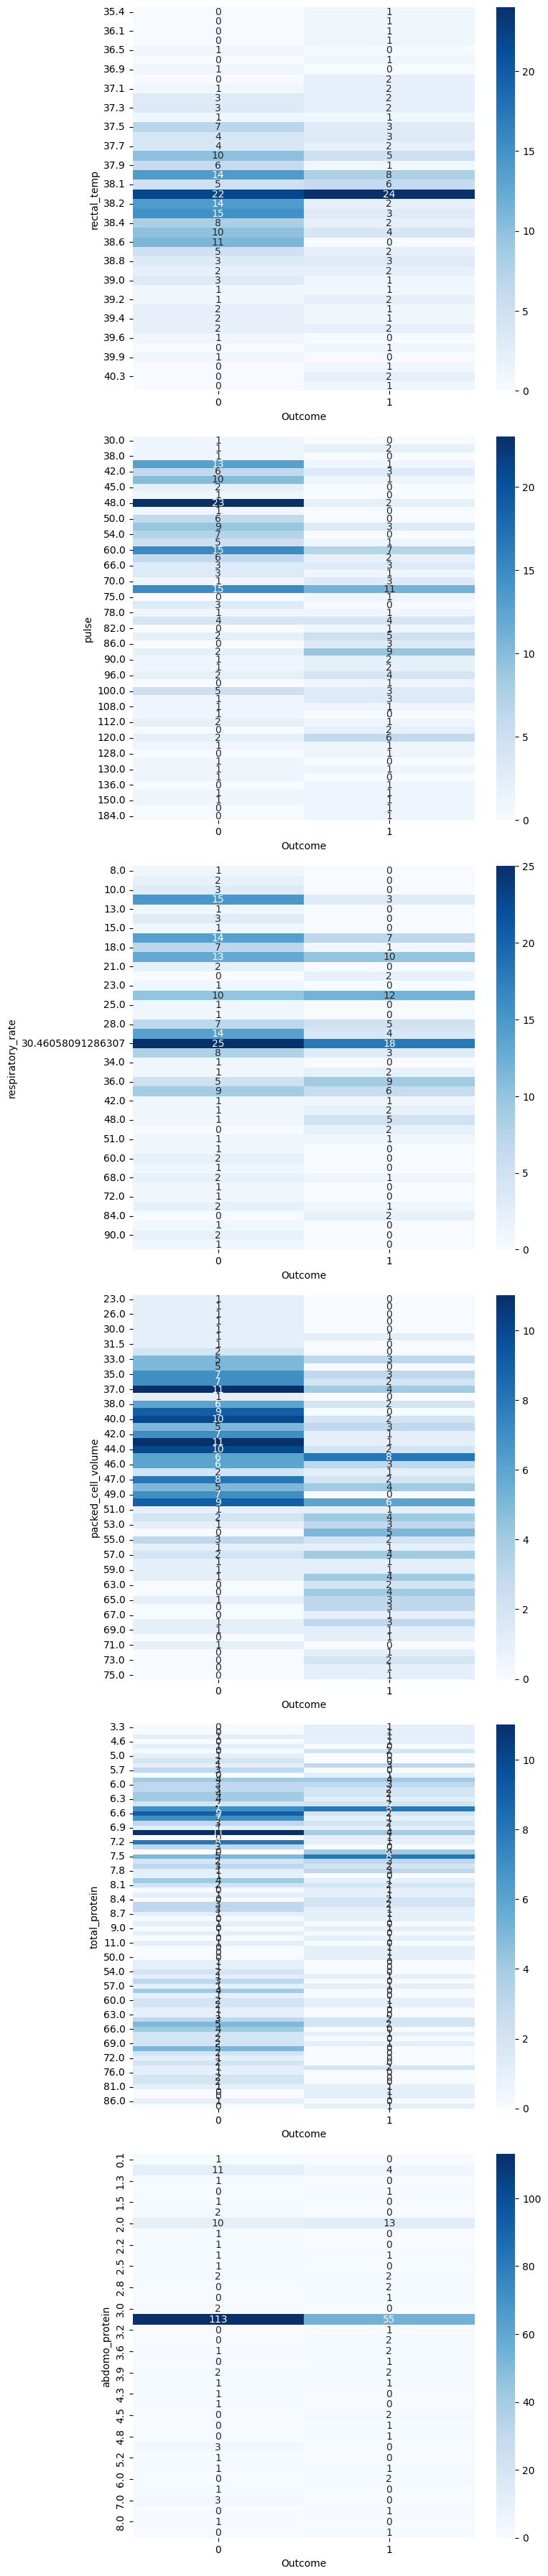

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming the contingency tables are stored in a list called 'contingency_tables'
# Assuming the names of the features used in the chi-square test are stored in a list called 'columns_for_chi2'

# Create a figure with subplots for each contingency table
fig, axes = plt.subplots(len(columns_for_chi2), figsize=(8, 6 * len(columns_for_chi2)))

# Plot heatmaps for each contingency table
for i, (column, contingency_table) in enumerate(zip(columns_for_chi2, contingency_tables)):
    ax = axes[i]
    sns.heatmap(contingency_table, annot=True, cmap='Blues', fmt='g', ax=ax)
    ax.set_xlabel('Outcome')
    ax.set_ylabel(column)

plt.tight_layout()
plt.show()


<Axes: >

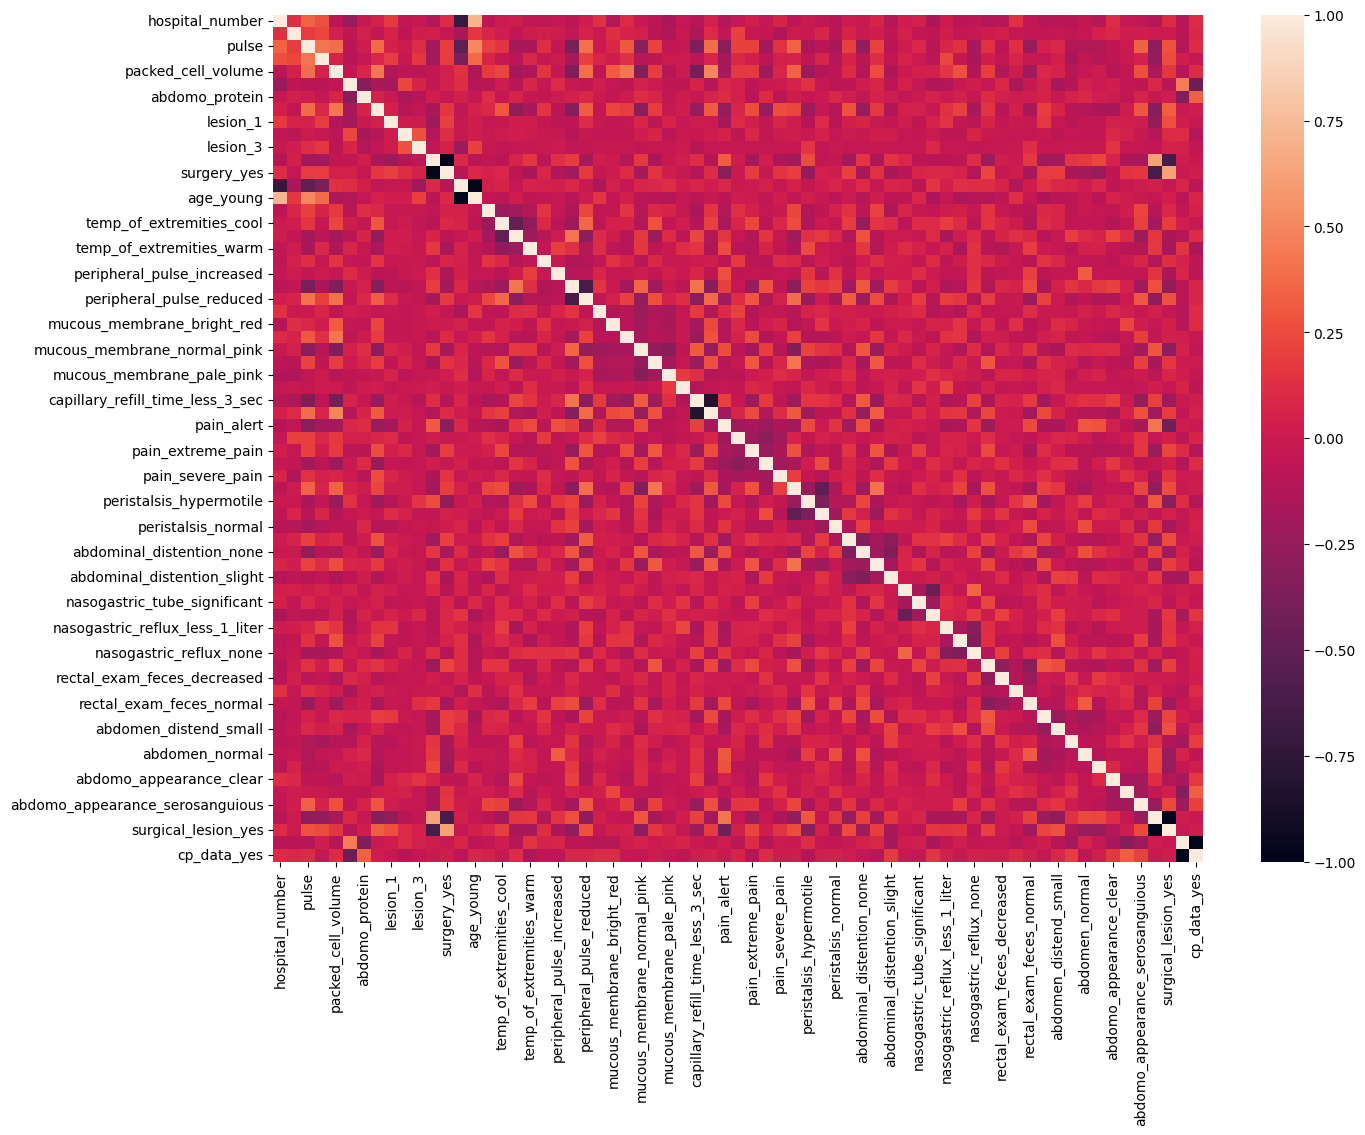

In [ ]:
plt.figure(figsize = (15, 11))
corr = data.corr()
sns.heatmap(corr)

In [ ]:
corr

hospital_number  rectal_temp     pulse  \
hospital_number                         1.000000     0.120515  0.343686   
rectal_temp                             0.120515     1.000000  0.180455   
pulse                                   0.343686     0.180455  1.000000   
respiratory_rate                        0.263799     0.227503  0.421589   
packed_cell_volume                     -0.080965     0.042564  0.389884   
...                                          ...          ...       ...   
abdomo_appearance_serosanguious        -0.053867     0.015948  0.332892   
surgical_lesion_no                     -0.101197     0.002462 -0.277588   
surgical_lesion_yes                     0.101197    -0.002462  0.277588   
cp_data_no                             -0.093900    -0.082275 -0.103392   
cp_data_yes                             0.093900     0.082275  0.103392   

                                 respiratory_rate  packed_cell_volume  \
hospital_number                          0.263799           -0.080965   
rectal_temp                              0.227503            0.042564   
pulse                                    0.421589            0.389884   
respiratory_rate                         1.000000            0.060181   
packed_cell_volume                       0.060181            1.000000   
...                                           ...                 ...   
abdomo_appearance_serosanguious          0.047184            0.258459   
surgical_lesion_no                      -0.257052           -0.157213   
surgical_lesion_yes                      0.257052            0.157213   
cp_data_no                               0.024602           -0.097870   
cp_data_yes                             -0.024602            0.097870   

                                 total_protein  abdomo_protein   outcome  \
hospital_number                      -0.227092       -0.020903  0.044832   
rectal_temp                          -0.061409        0.043504 -0.042923   
pulse                                -0.083981        0.014422  0.382539   
respiratory_rate                     -0.089947       -0.034457  0.079947   
packed_cell_volume                   -0.042868        0.070745  0.429113   
...                                        ...             ...       ...   
abdomo_appearance_serosanguious      -0.057217        0.061547  0.288242   
surgical_lesion_no                    0.089978       -0.020927 -0.326542   
surgical_lesion_yes                  -0.089978        0.020927  0.326542   
cp_data_no                            0.446782       -0.330773 -0.013344   
cp_data_yes                          -0.446782        0.330773  0.013344   

                                 lesion_1  lesion_2  ...  abdomen_firm  \
hospital_number                  0.178452 -0.053725  ...     -0.079632   
rectal_temp                      0.060889 -0.067671  ...     -0.059368   
pulse                            0.053799  0.002290  ...     -0.120587   
respiratory_rate                 0.184963 -0.018251  ...     -0.167555   
packed_cell_volume              -0.111875 -0.077868  ...     -0.093907   
...                                   ...       ...  ...           ...   
abdomo_appearance_serosanguious  0.017320 -0.016143  ...      0.007816   
surgical_lesion_no              -0.260120 -0.098476  ...      0.135573   
surgical_lesion_yes              0.260120  0.098476  ...     -0.135573   
cp_data_no                       0.016287  0.107982  ...     -0.189007   
cp_data_yes                     -0.016287 -0.107982  ...      0.189007   

                                 abdomen_normal  abdomen_other  \
hospital_number                       -0.043948      -0.098539   
rectal_temp                           -0.030811       0.052027   
pulse                                 -0.123434      -0.123828   
respiratory_rate                      -0.044798      -0.099457   
packed_cell_volume                    -0.032211       0.003915   
...                                         ...          

<Axes: xlabel='respiratory_rate', ylabel='outcome'>

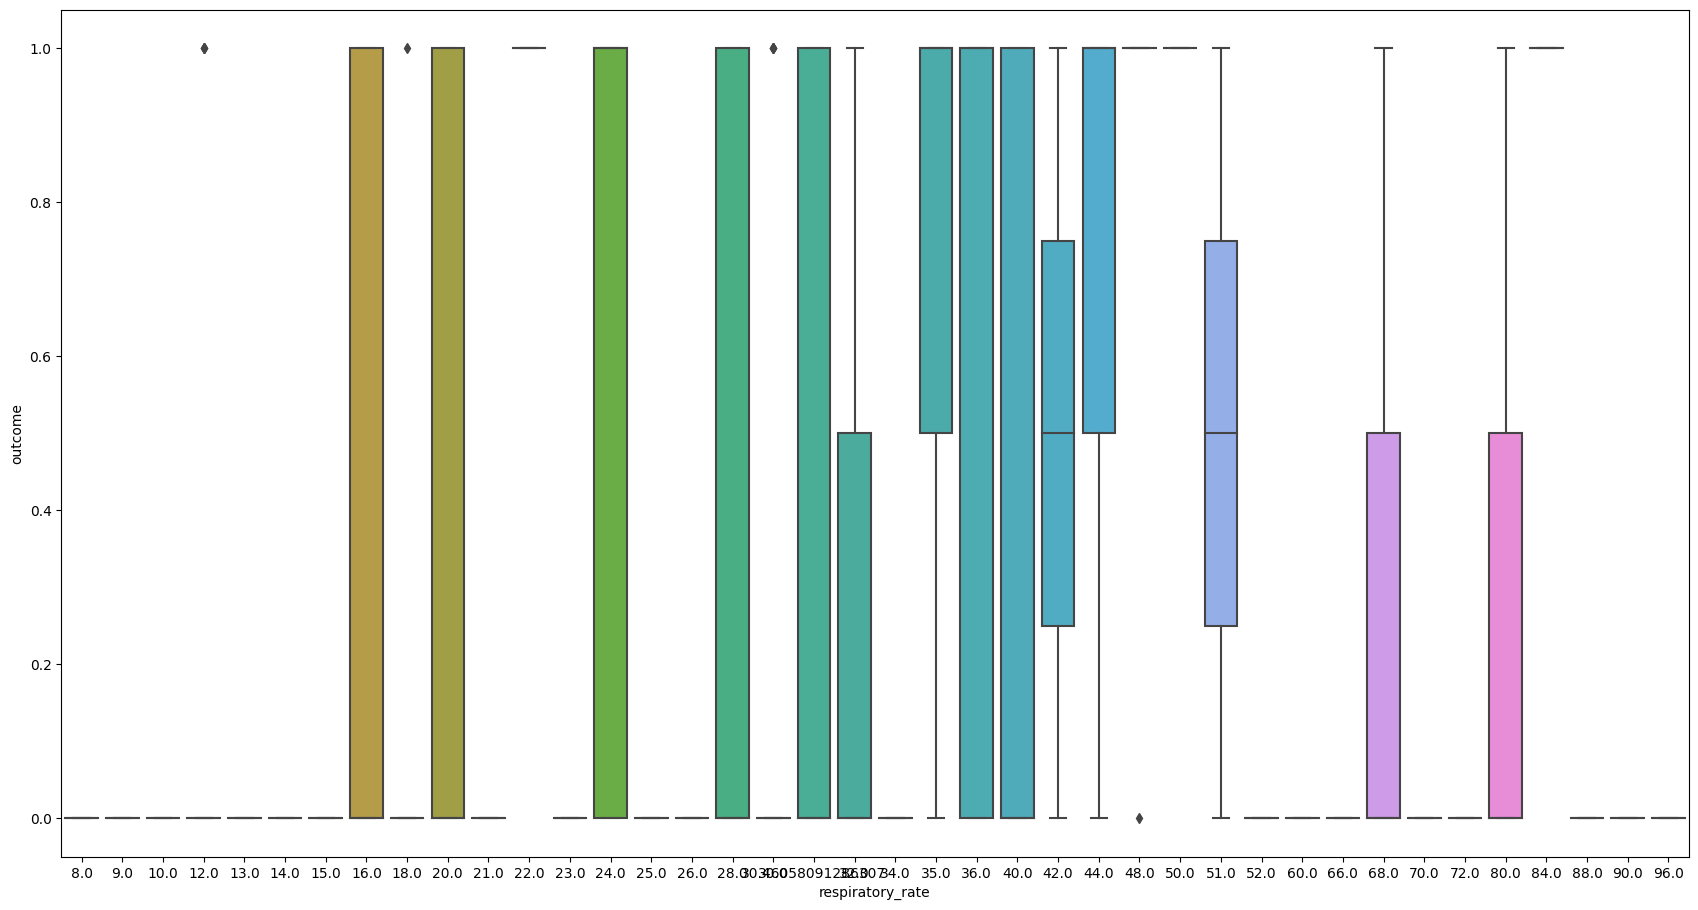

In [ ]:
plt.figure(figsize = (21, 11))
sns.boxplot(x = 'respiratory_rate', y = 'outcome', data = data)

<Axes: xlabel='pulse', ylabel='outcome'>

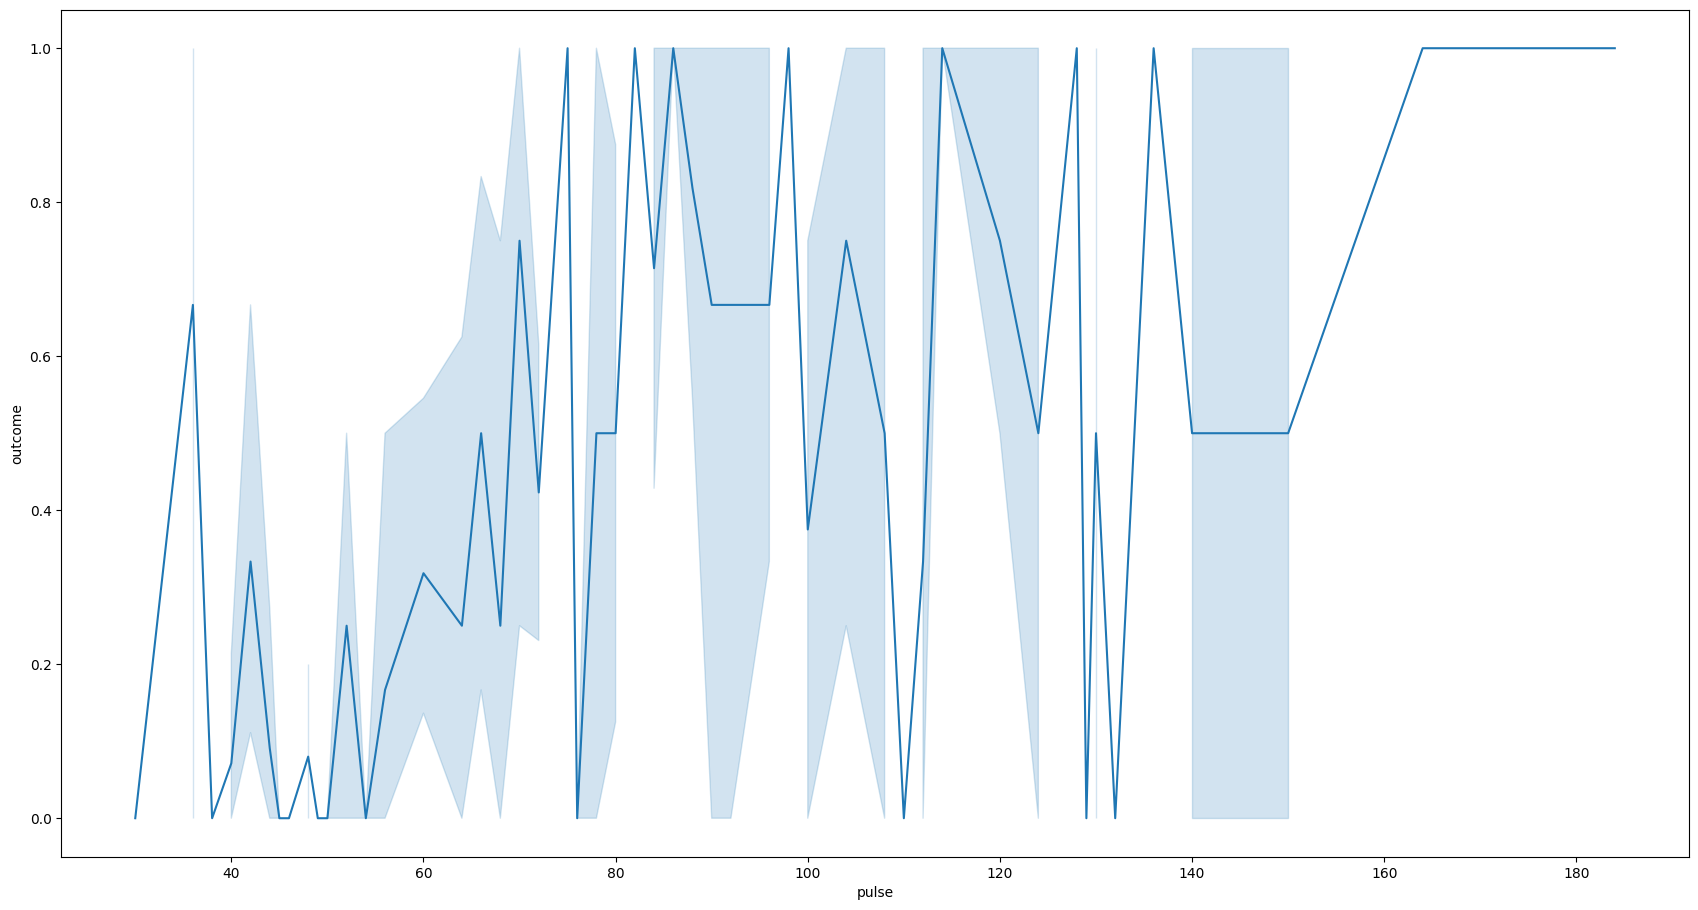

In [ ]:
plt.figure(figsize = (21, 11))
sns.lineplot(x = 'pulse', y = 'outcome', data =data)

In [ ]:
from sklearn.utils import resample
data_major = data[(data['outcome'] == 0)]
data_minor = data[(data['outcome'] == 1)]
data_resample = resample(data_minor, replace = True, n_samples = 163, random_state = 42)
data = pd.concat([data_major, data_resample])

In [ ]:
data['outcome'].value_counts()

0    163
1    163
Name: outcome, dtype: int64

In [ ]:
X = data.drop(columns = ['outcome'])
y = data['outcome']
print(X)
print(y)

     hospital_number  rectal_temp  pulse  respiratory_rate  \
2             530334    38.300000   40.0         24.000000   
6             526802    37.900000   48.0         16.000000   
9            5299629    38.300000   90.0         30.460581   
10            528548    38.100000   66.0         12.000000   
11            527927    39.100000   72.0         52.000000   
..               ...          ...    ...               ...   
4             530255    37.300000  104.0         35.000000   
281           527544    38.168619   70.0         16.000000   
62            528630    37.800000   88.0         22.000000   
43            534069    38.168619  120.0         30.460581   
123           530360    38.200000   64.0         24.000000   

     packed_cell_volume  total_protein  abdomo_protein  lesion_1  lesion_2  \
2                  33.0            6.7        3.039604         0         0   
6                  37.0            7.0        3.039604      3124         0   
9                  40

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
rf = RandomForestClassifier(random_state = 42)
xg = XGBClassifier(random_state = 42)

In [ ]:
rf.fit(X_train, y_train)
xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [ ]:
y_pred_rf = rf.predict(X_test)
y_pred_xg = xg.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score
accuracy_score_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)
recall_score_rf = recall_score(y_test, y_pred_rf)
f1_score_rf = f1_score(y_test, y_pred_rf)

In [ ]:
print('accuracy_score_rf: ', accuracy_score_rf)
print('classification_report_rf: ', classification_report_rf)
print('recall_score_rf: ', recall_score_rf)
print('f1_score_rf: ', f1_score_rf)

accuracy_score_rf:  0.8939393939393939
classification_report_rf:                precision    recall  f1-score   support

           0       0.86      0.94      0.90        33
           1       0.93      0.85      0.89        33

    accuracy                           0.89        66
   macro avg       0.90      0.89      0.89        66
weighted avg       0.90      0.89      0.89        66

recall_score_rf:  0.8484848484848485
f1_score_rf:  0.888888888888889


In [ ]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score
accuracy_score_xg = accuracy_score(y_test, y_pred_xg)
classification_report_xg = classification_report(y_test, y_pred_xg)
recall_score_xg = recall_score(y_test, y_pred_xg)
f1_score_xg = f1_score(y_test, y_pred_xg)

In [ ]:
print('accuracy_score_xg:', accuracy_score_xg)
print('classification_report_xg:', classification_report_xg)
print('recall_score_xg:', recall_score_xg)
print('f1_score_xg:', f1_score_xg)

accuracy_score_xg: 0.8484848484848485
classification_report_xg:               precision    recall  f1-score   support

           0       0.85      0.85      0.85        33
           1       0.85      0.85      0.85        33

    accuracy                           0.85        66
   macro avg       0.85      0.85      0.85        66
weighted avg       0.85      0.85      0.85        66

recall_score_xg: 0.8484848484848485
f1_score_xg: 0.8484848484848486


In [ ]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score
accuracy_score_nn = accuracy_score(y_test, y_pred_nn)
classification_report_nn = classification_report(y_test, y_pred_nn)
recall_score_nn = recall_score(y_test, y_pred_nn)
f1_score_nn = f1_score(y_test, y_pred_nn)

In [ ]:
print('accuracy_score_nn:', accuracy_score_nn)
print('classification_report_nn:', classification_report_nn)
print('recall_score_nn:', recall_score_nn)
print('f1_score_nn:', f1_score_nn)

accuracy_score_nn: 0.48484848484848486
classification_report_nn:               precision    recall  f1-score   support

           0       0.43      0.09      0.15        33
           1       0.49      0.88      0.63        33

    accuracy                           0.48        66
   macro avg       0.46      0.48      0.39        66
weighted avg       0.46      0.48      0.39        66

recall_score_nn: 0.8787878787878788
f1_score_nn: 0.6304347826086957


In [ ]:
new_data

hospital_number  rectal_temp  pulse  respiratory_rate  \
292           534004    38.168619   78.0              24.0   
293           533902    38.500000   40.0              16.0   
294           533886    38.168619  120.0              70.0   
296           529386    37.500000   72.0              30.0   
297           530612    36.500000  100.0              24.0   
298           534618    37.200000   40.0              20.0   

     packed_cell_volume  total_protein  abdomo_protein  outcome  lesion_1  \
292                43.0           62.0        2.000000        1      2209   
293                37.0           67.0        3.039604        0         0   
294                55.0           65.0        3.039604        1      3205   
296                60.0            6.8        3.039604        1      3205   
297                50.0            6.0        3.400000        0      2208   
298                36.0           62.0        1.000000        1      6112   

     lesion_2  ...  abdomen_firm  abdomen_normal  abdomen_other  \
292         0  ...             0               0              0   
293         0  ...             0               0              1   
294         0  ...             0               0              0   
296         0  ...             0               0              0   
297         0  ...             0               0              0   
298         0  ...             0               1              0   

     abdomo_appearance_clear  abdomo_appearance_cloudy  \
292                        0                         0   
293                        0                         0   
294                        0                         0   
296                        0                         0   
297                        0                         0   
298                        1                         0   

     abdomo_appearance_serosanguious  surgical_lesion_no  surgical_lesion_yes  \
292                                0                   1                    0   
293                                0                   1                    0   
294                                0                   1                    0   
296                                0                   0                    1   
297                                1                   0                    1   
298                                0                   1                    0   

     cp_data_no  cp_data_yes  
292           1            0  
293           1            0  
294           1            0  
296           1            0  
297           0            1  
298           1            0  

[6 rows x 67 columns]

In [ ]:
new_data.drop(columns = ['outcome'], inplace  = True)

<ipython-input-46-b1ba6f3a8186>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data.drop(columns = ['outcome'], inplace  = True)


In [ ]:
new_data

hospital_number  rectal_temp  pulse  respiratory_rate  \
292           534004    38.168619   78.0              24.0   
293           533902    38.500000   40.0              16.0   
294           533886    38.168619  120.0              70.0   
296           529386    37.500000   72.0              30.0   
297           530612    36.500000  100.0              24.0   
298           534618    37.200000   40.0              20.0   

     packed_cell_volume  total_protein  abdomo_protein  lesion_1  lesion_2  \
292                43.0           62.0        2.000000      2209         0   
293                37.0           67.0        3.039604         0         0   
294                55.0           65.0        3.039604      3205         0   
296                60.0            6.8        3.039604      3205         0   
297                50.0            6.0        3.400000      2208         0   
298                36.0           62.0        1.000000      6112         0   

     lesion_3  ...  abdomen_firm  abdomen_normal  abdomen_other  \
292         0  ...             0               0              0   
293         0  ...             0               0              1   
294         0  ...             0               0              0   
296         0  ...             0               0              0   
297         0  ...             0               0              0   
298         0  ...             0               1              0   

     abdomo_appearance_clear  abdomo_appearance_cloudy  \
292                        0                         0   
293                        0                         0   
294                        0                         0   
296                        0                         0   
297                        0                         0   
298                        1                         0   

     abdomo_appearance_serosanguious  surgical_lesion_no  surgical_lesion_yes  \
292                                0                   1                    0   
293                                0                   1                    0   
294                                0                   1                    0   
296                                0                   0                    1   
297                                1                   0                    1   
298                                0                   1                    0   

     cp_data_no  cp_data_yes  
292           1            0  
293           1            0  
294           1            0  
296           1            0  
297           0            1  
298           1            0  

[6 rows x 66 columns]

In [88]:
prediction_rf = rf.predict(new_data)
print(prediction_rf)
predicton_xg = xg.predict(new_data)
print(predicton_xg)
prediction_nn = nn.predict(new_data)
print(prediction_nn)
prediction_gb = gb.predict(new_data)
print(prediction_gb)
probability_gb= gb.predict_proba(new_data)[:, 1]
print(probability_gb)


[0 0 1 1 1 0]
[1 0 1 1 1 0]
[1 1 1 1 1 1]
[1 0 0 1 1 0]
[0.53299298 0.01038021 0.36770443 0.90674654 0.9764881  0.10125925]


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

In [81]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, f1_score
accuracy_score_gb = accuracy_score(y_test, y_pred_gb)
classification_report_gb = classification_report(y_test, y_pred_gb)
recall_score_gb = recall_score(y_test, y_pred_gb)
f1_score_gb = f1_score(y_test, y_pred_gb)

In [83]:
from sklearn.metrics import recall_score

# Calculate TPR
tpr_gb = recall_score(y_test, y_pred_gb, pos_label=1)

print("True Positive Rate (TPR):", tpr_gb)

True Positive Rate (TPR): 0.8787878787878788


In [84]:
from sklearn.metrics import roc_curve

# Calculate FPR, TPR, and thresholds
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_gb)

print("False Positive Rate (FPR):", fpr_gb)


False Positive Rate (FPR): [0.         0.06060606 1.        ]


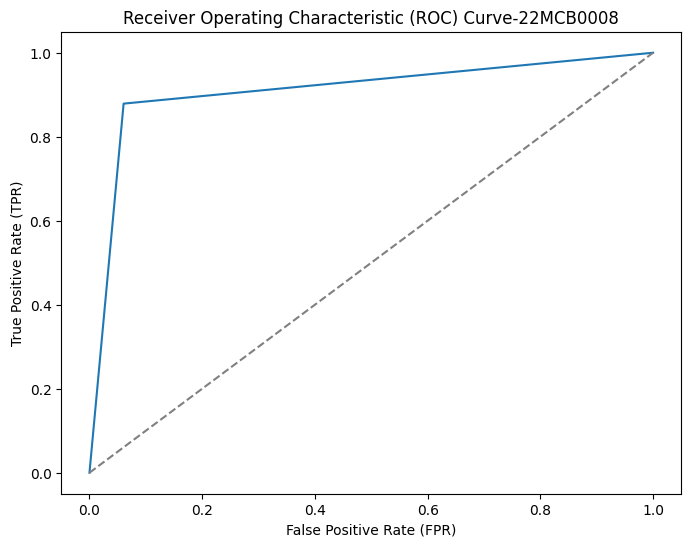

In [86]:
import matplotlib.pyplot as plt

# Calculate FPR, TPR, and thresholds
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_gb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve-22MCB0008')
plt.show()

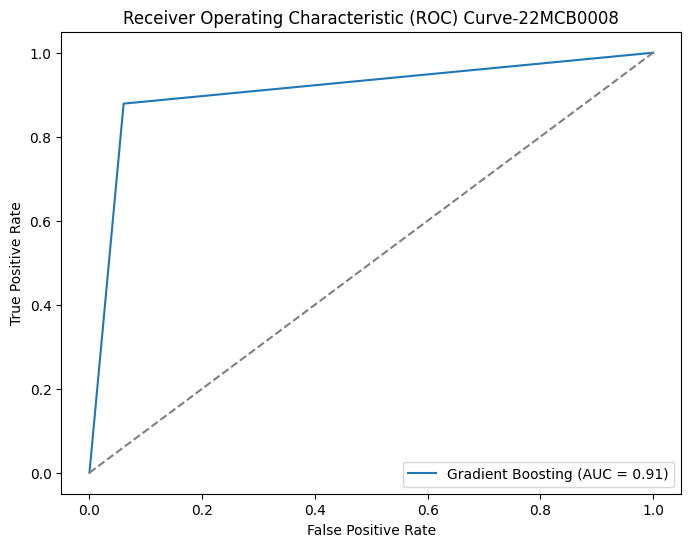

In [87]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate TPR, FPR, and thresholds
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_gb)

# Calculate AUC score
auc_gb = roc_auc_score(y_test, y_pred_gb)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_gb, tpr_gb, label='Gradient Boosting (AUC = {:.2f})'.format(auc_gb))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve-22MCB0008')
plt.legend(loc='lower right')
plt.show()


In [ ]:
print('accuracy_score_gb:', accuracy_score_gb)
print('classification_report_gb:', classification_report_gb)
print('recall_score_gb:', recall_score_gb)
print('f1_score_gb:', f1_score_gb)

accuracy_score_gb: 0.9090909090909091
classification_report_gb:               precision    recall  f1-score   support

           0       0.89      0.94      0.91        33
           1       0.94      0.88      0.91        33

    accuracy                           0.91        66
   macro avg       0.91      0.91      0.91        66
weighted avg       0.91      0.91      0.91        66

recall_score_gb: 0.8787878787878788
f1_score_gb: 0.90625


WORKING ON DATASET FROM A DIFFERENT PERSPECTIVE

In [ ]:
from tensorflow.keras import losses, models, optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.callbacks import (EarlyStopping, LearningRateScheduler,
                             ModelCheckpoint, TensorBoard, ReduceLROnPlateau)
from tensorflow.keras.layers import (Convolution2D, Dense, Dropout, GlobalAveragePooling2D, 
                              GlobalMaxPool2D, Input, MaxPool2D, concatenate, Activation,  
                              MaxPooling2D,Flatten,BatchNormalization, Conv2D,AveragePooling2D)
from tensorflow.keras.utils import Sequence, to_categorical
from sklearn.datasets import load_iris 
from sklearn.datasets import make_moons 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import utils
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
data = pd.read_csv('/content/horse.csv')
data

surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0        no  adult           530101         38.5   66.0              28.0   
1       yes  adult           534817         39.2   88.0              20.0   
2        no  adult           530334         38.3   40.0              24.0   
3       yes  young          5290409         39.1  164.0              84.0   
4        no  adult           530255         37.3  104.0              35.0   
..      ...    ...              ...          ...    ...               ...   
294     yes  adult           533886          NaN  120.0              70.0   
295      no  adult           527702         37.2   72.0              24.0   
296     yes  adult           529386         37.5   72.0              30.0   
297     yes  adult           530612         36.5  100.0              24.0   
298     yes  adult           534618         37.2   40.0              20.0   

    temp_of_extremities peripheral_pulse mucous_membrane  \
0                  cool          reduced             NaN   
1                   NaN              NaN   pale_cyanotic   
2                normal           normal       pale_pink   
3                  cold           normal   dark_cyanotic   
4                   NaN              NaN   dark_cyanotic   
..                  ...              ...             ...   
294                cold              NaN   pale_cyanotic   
295                cool        increased   pale_cyanotic   
296                cold          reduced   pale_cyanotic   
297                cool          reduced       pale_pink   
298                 NaN              NaN             NaN   

    capillary_refill_time  ... packed_cell_volume total_protein  \
0              more_3_sec  ...               45.0           8.4   
1              less_3_sec  ...               50.0          85.0   
2              less_3_sec  ...               33.0           6.7   
3              more_3_sec  ...               48.0           7.2   
4              more_3_sec  ...               74.0           7.4   
..                    ...  ...                ...           ...   
294            more_3_sec  ...               55.0          65.0   
295            more_3_sec  ...               44.0           NaN   
296            less_3_sec  ...               60.0           6.8   
297            less_3_sec  ...               50.0           6.0   
298                   NaN  ...               36.0          62.0   

    abdomo_appearance abdomo_protein     outcome  surgical_lesion lesion_1  \
0                 NaN            NaN        died               no    11300   
1              cloudy            2.0  euthanized               no     2208   
2                 NaN            NaN       lived               no        0   
3       serosanguious            5.3        died              yes     2208   
4                 NaN            NaN        died               no     4300   
..                ...            ...         ...              ...      ...   
294               NaN            NaN  euthanized               no     3205   
295     serosanguious            3.3  euthanized              yes     2208   
296               NaN            NaN        died              yes     3205   
297     serosanguious            3.4       lived              yes     2208   
298             clear            1.0  euthanized               no     6112   

    lesion_2  lesion_3  cp_data  
0          0         0       no  
1          0         0       no  
2          0         0      yes  
3          0         0      yes  
4          0         0       no  
..       ...       ...      ...  
294        0         0       no  
295        0         0      yes  
296        0         0       no  
297        0         0      yes  
298        0         0       no  

[299 rows x 28 columns]

In [ ]:
print('Old size: %d' % len(data))
data = data.drop(columns=['nasogastric_tube', 'nasogastric_reflux','nasogastric_reflux_ph','rectal_exam_feces','rectal_exam_feces','abdomen','abdomo_appearance','abdomo_protein','cp_data'])

print('New size: %d\n' % len(data))

Old size: 299
New size: 299



In [ ]:
data

surgery    age  hospital_number  rectal_temp  pulse  respiratory_rate  \
0        no  adult           530101         38.5   66.0              28.0   
1       yes  adult           534817         39.2   88.0              20.0   
2        no  adult           530334         38.3   40.0              24.0   
3       yes  young          5290409         39.1  164.0              84.0   
4        no  adult           530255         37.3  104.0              35.0   
..      ...    ...              ...          ...    ...               ...   
294     yes  adult           533886          NaN  120.0              70.0   
295      no  adult           527702         37.2   72.0              24.0   
296     yes  adult           529386         37.5   72.0              30.0   
297     yes  adult           530612         36.5  100.0              24.0   
298     yes  adult           534618         37.2   40.0              20.0   

    temp_of_extremities peripheral_pulse mucous_membrane  \
0                  cool          reduced             NaN   
1                   NaN              NaN   pale_cyanotic   
2                normal           normal       pale_pink   
3                  cold           normal   dark_cyanotic   
4                   NaN              NaN   dark_cyanotic   
..                  ...              ...             ...   
294                cold              NaN   pale_cyanotic   
295                cool        increased   pale_cyanotic   
296                cold          reduced   pale_cyanotic   
297                cool          reduced       pale_pink   
298                 NaN              NaN             NaN   

    capillary_refill_time          pain peristalsis abdominal_distention  \
0              more_3_sec  extreme_pain      absent               severe   
1              less_3_sec     mild_pain      absent               slight   
2              less_3_sec     mild_pain  hypomotile                 none   
3              more_3_sec     depressed      absent               severe   
4              more_3_sec           NaN         NaN                  NaN   
..                    ...           ...         ...                  ...   
294            more_3_sec     depressed      absent                  NaN   
295            more_3_sec   severe_pain  hypomotile             moderate   
296            less_3_sec   severe_pain      absent             moderate   
297            less_3_sec     mild_pain  hypomotile             moderate   
298                   NaN           NaN         NaN                  NaN   

     packed_cell_volume  total_protein     outcome surgical_lesion  lesion_1  \
0                  45.0            8.4        died              no     11300   
1                  50.0           85.0  euthanized              no      2208   
2                  33.0            6.7       lived              no         0   
3                  48.0            7.2        died             yes      2208   
4                  74.0            7.4        died              no      4300   
..                  ...            ...         ...             ...       ...   
294                55.0           65.0  euthanized              no      3205   
295                44.0            NaN  euthanized             yes      2208   
296                60.0            6.8        died             yes      3205   
297                50.0            6.0       lived             yes      2208   
298                36.0           62.0  euthanized              no      6112   

     lesion_2  lesion_3  
0           0         0  
1           0         0  
2           0         0  
3           0         0  
4           0         0  
..        ...       ...  
294         0         0  
295         0         0  
296         0         0  
297         0         0  
298         0         0  

[299 rows x 20 columns]

In [ ]:
for col in data.columns.values:
    data[col]=data[col].astype('category').cat.codes

target=data['outcome']
print(target.value_counts())

2    178
0     77
1     44
Name: outcome, dtype: int64


In [ ]:
data.dtypes.value_counts()

int8     19
int16     1
dtype: int64

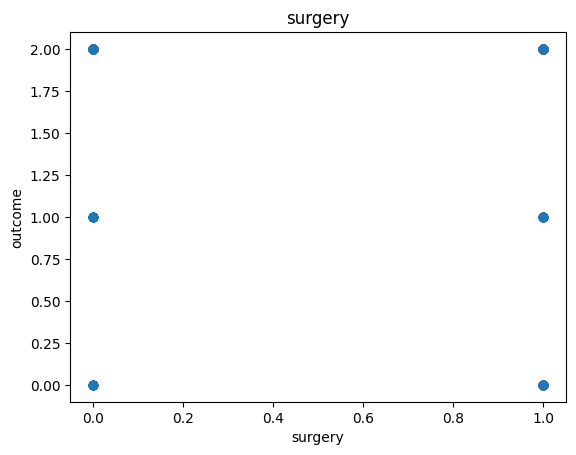

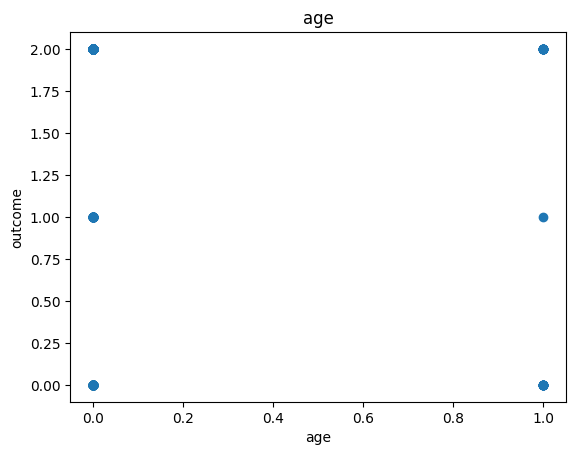

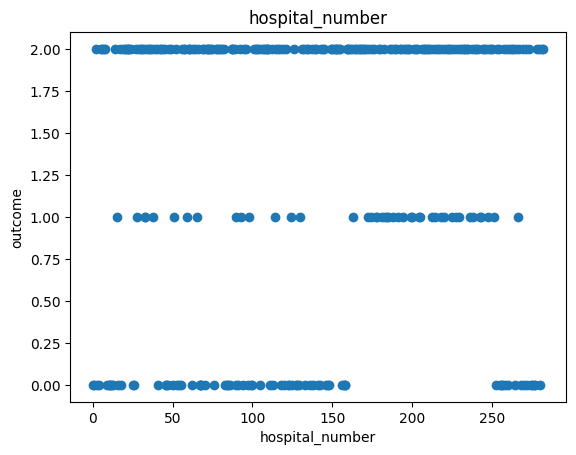

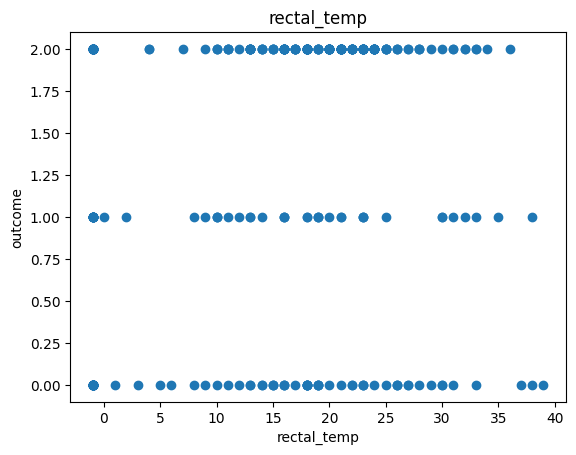

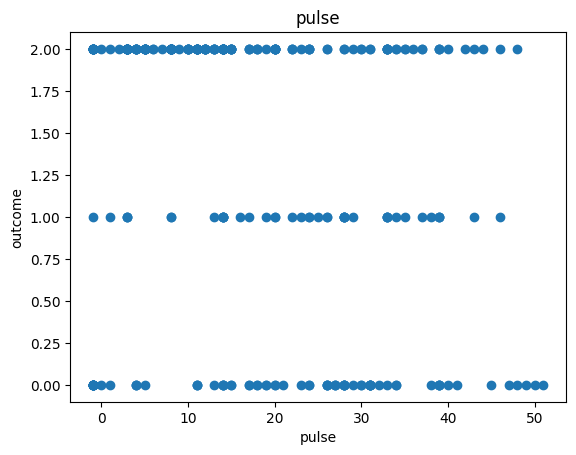

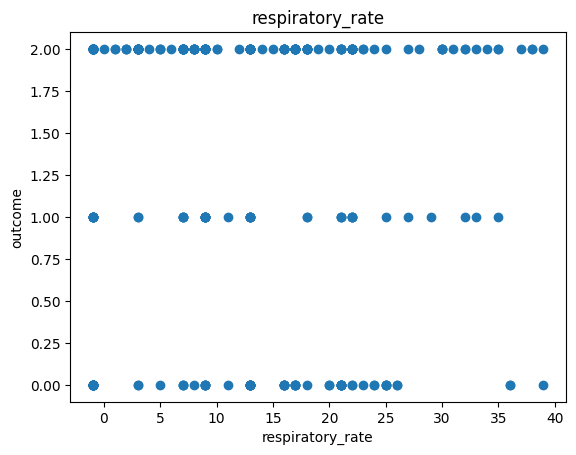

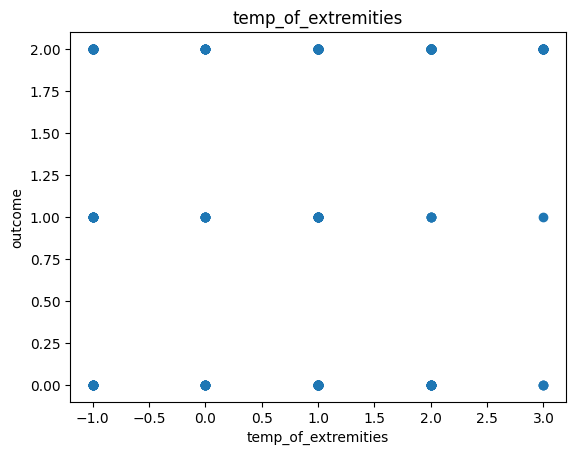

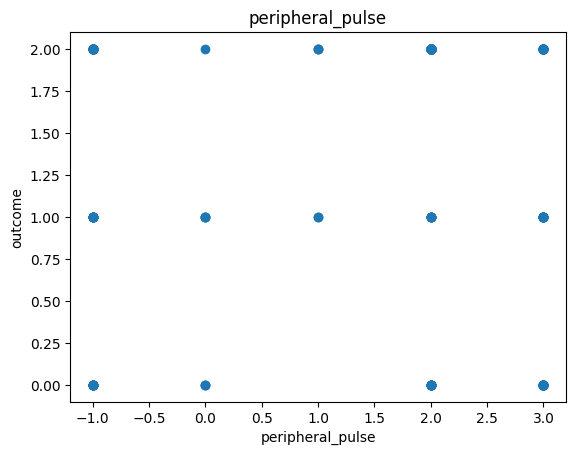

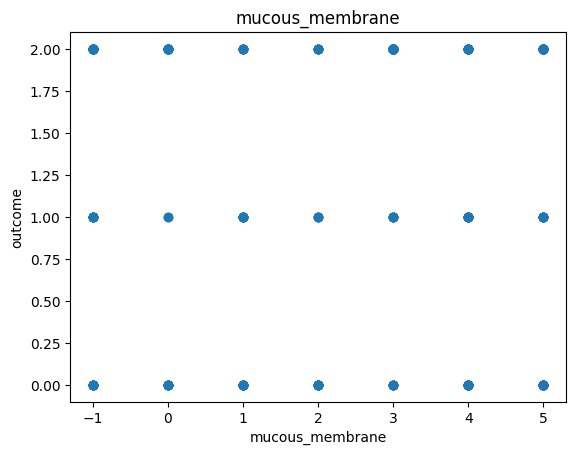

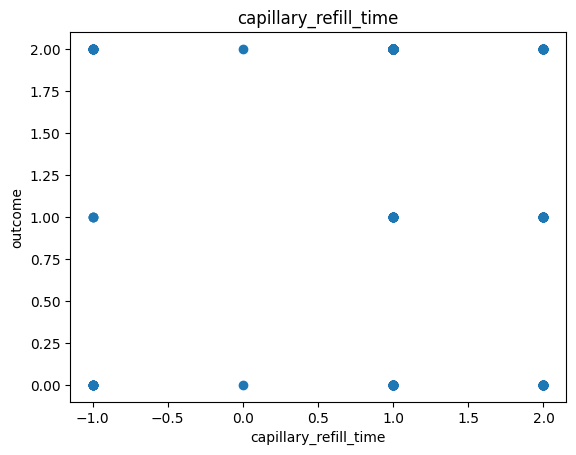

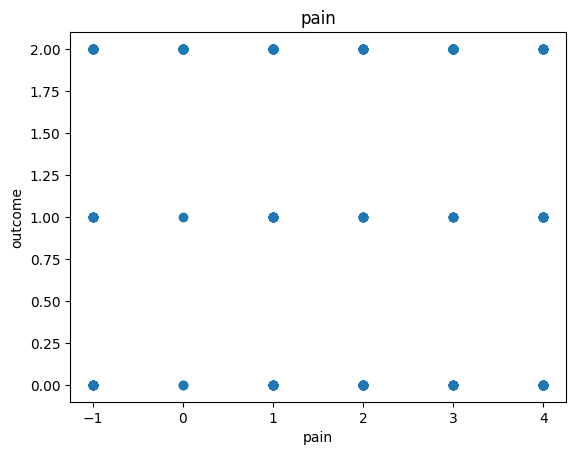

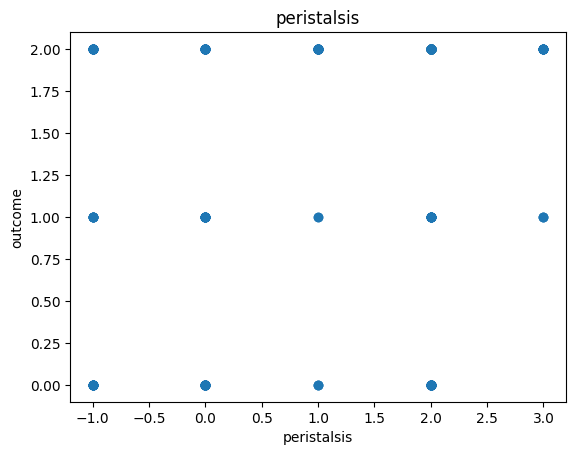

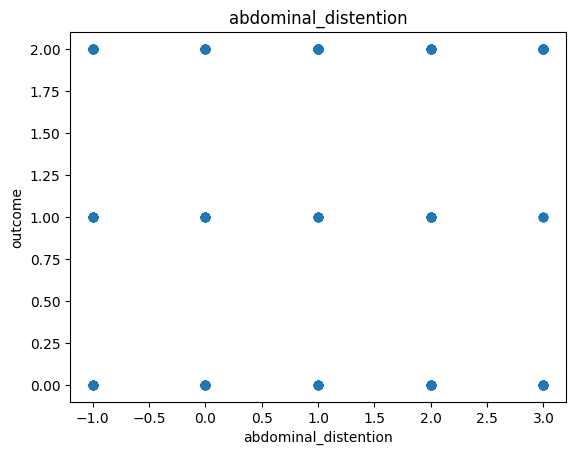

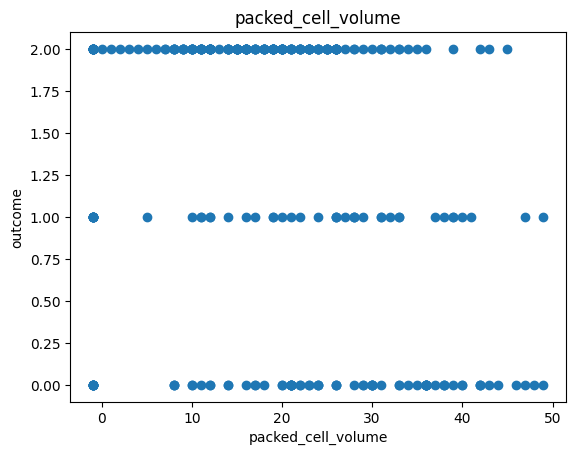

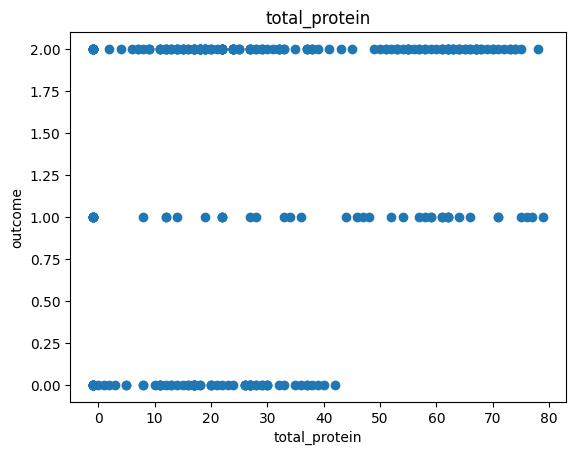

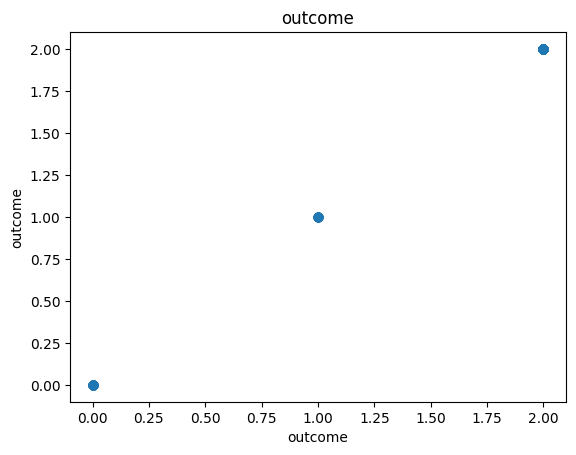

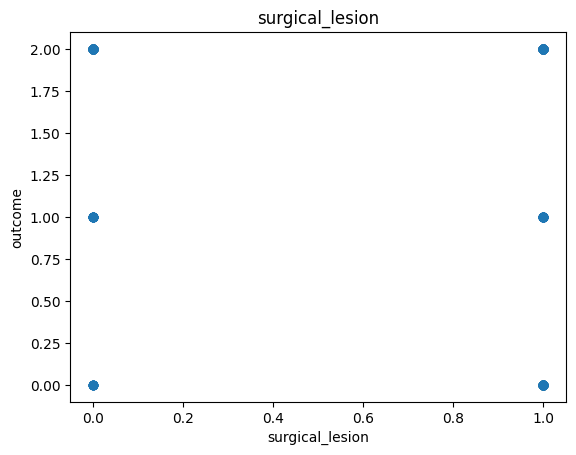

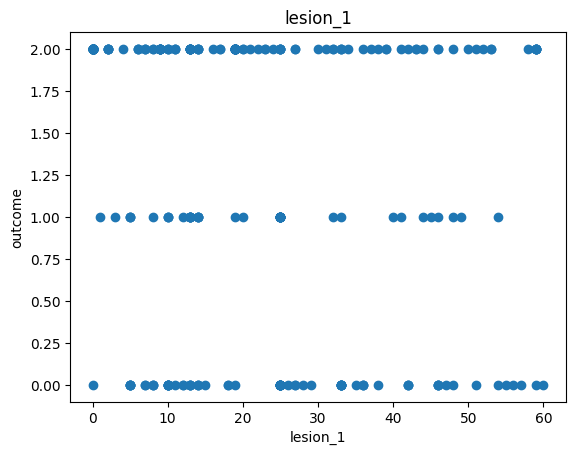

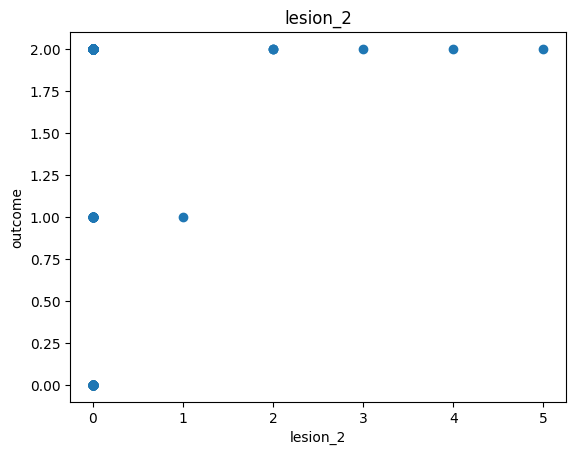

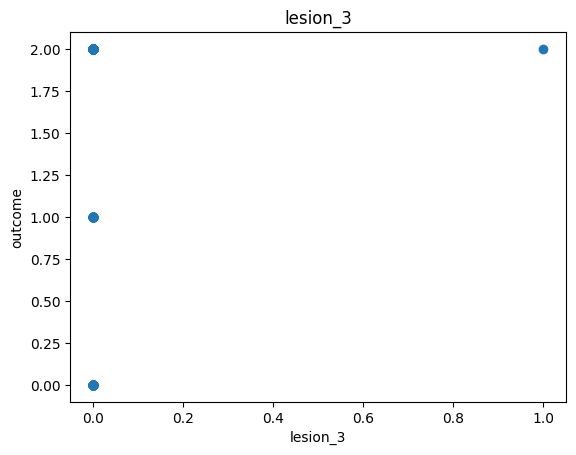

In [ ]:
for i in range(len(data.columns)):
  fig=plt.figure()
  ax1=fig.add_subplot(1,1,1)
  ax1.scatter(data[[data.columns[i]]], target)
 
  ax1.set_title(data.columns[i])
 
  ax1.set_xlabel(data.columns[i])
  ax1.set_ylabel('outcome')

In [ ]:
for col in data.columns.values:
    data[col]=data[col].astype('category').cat.codes

target=data['outcome']
print(target.value_counts())

2    178
0     77
1     44
Name: outcome, dtype: int64


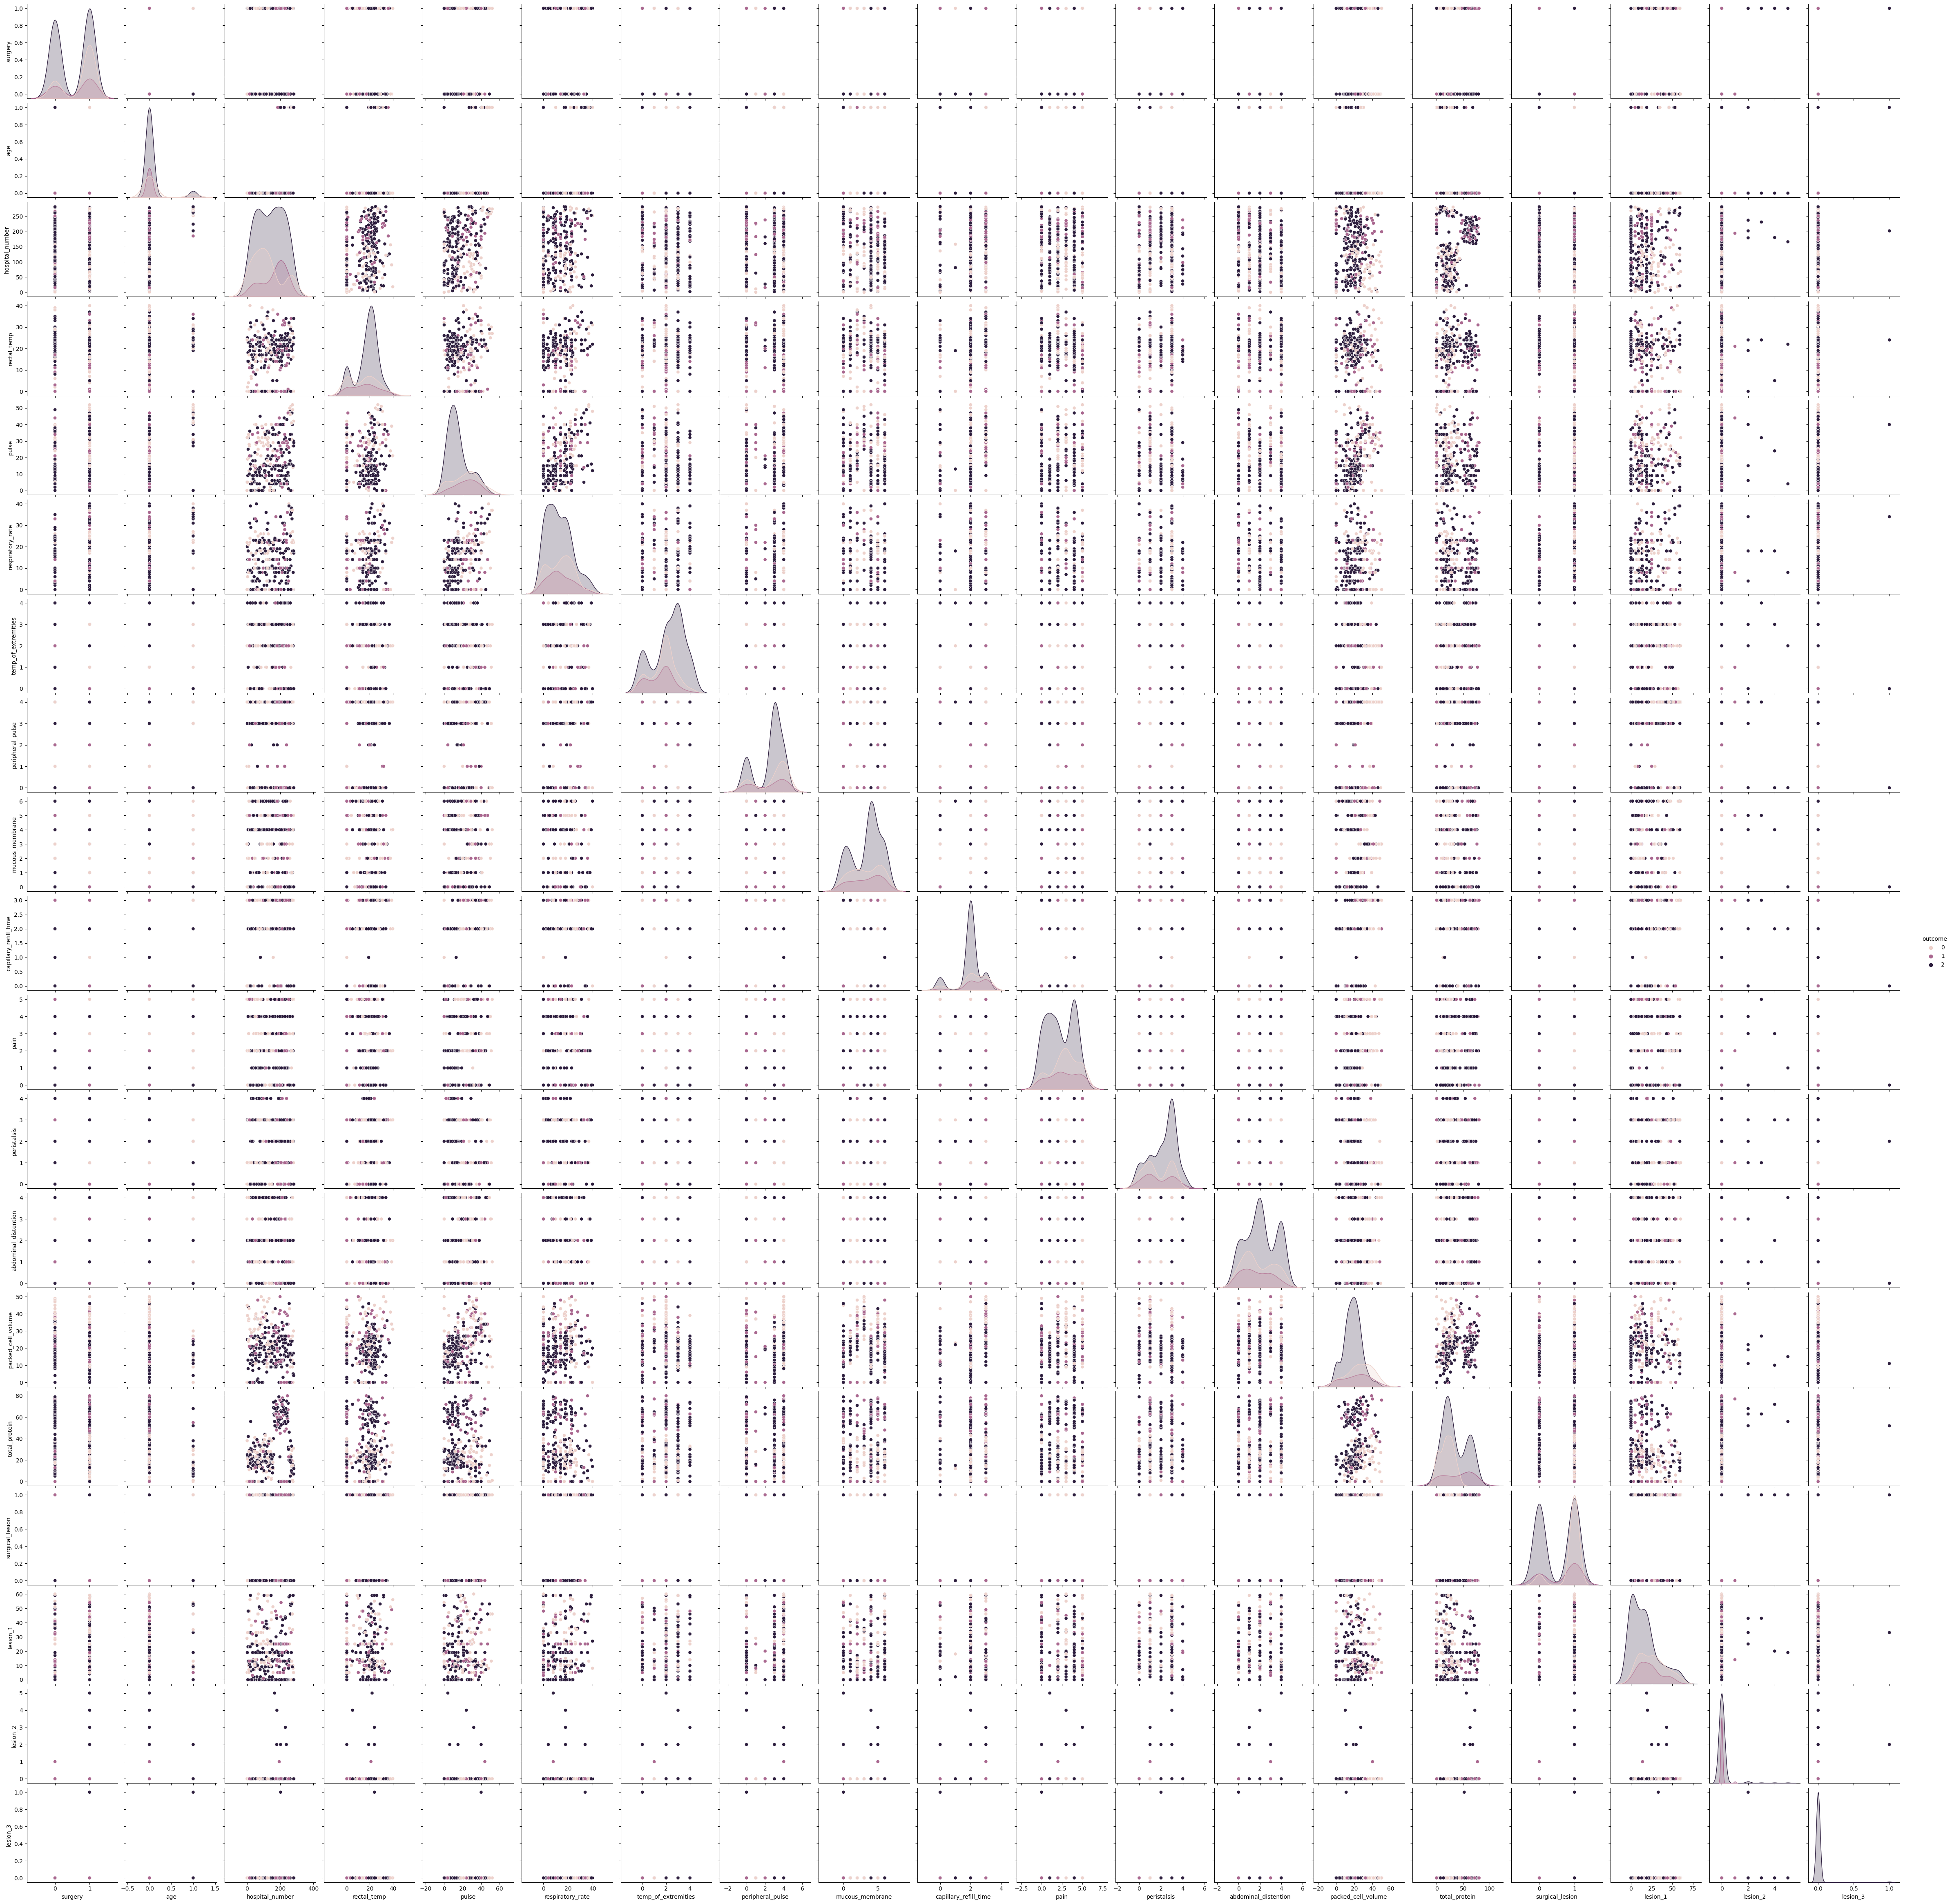

In [ ]:
sns.pairplot(
    data,
    hue="outcome"
)

In [ ]:
x = data.loc[:,data.columns!='outcome']
y = data['outcome']
moonsX_train, moonsX_test, moonsY_train, moonsY_test = train_test_split(x, y, test_size=0.4, random_state=0)

In [ ]:
# Decision Tree 

moonsX_train, moonsX_test, moonsY_train, moonsY_test = train_test_split(x, y, test_size=0.4, random_state=0)
clf = DecisionTreeClassifier(max_depth=10)
clf = clf.fit(moonsX_train, moonsY_train)
moonsY_pred = clf.predict(moonsX_test)
dec_tree_score1 = clf.score(moonsX_test, moonsY_test)
print('dec_tree_score ',dec_tree_score1)
print(confusion_matrix(moonsY_test, moonsY_pred))

export_graphviz(clf, out_file='tree.dot')



dec_tree_score  0.65
[[18  1 10]
 [ 6  7  8]
 [11  6 53]]


In [ ]:
# RandomForestClassifier 

clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=0)
clf = clf.fit(moonsX_train, moonsY_train)
moonsY_pred = clf.predict(moonsX_test)
rand_frst_score1 = clf.score(moonsX_test, moonsY_test)
print('dec_tree_score ',rand_frst_score1)
confusion_matrix(moonsY_test, moonsY_pred)

dec_tree_score  0.625


array([[ 8,  0, 21],
       [ 3,  0, 18],
       [ 3,  0, 67]])

In [ ]:
# # GradientBoostingClassifierx  

clf = RandomForestClassifier()
clf = clf.fit(moonsX_train, moonsY_train)
moonsY_pred = clf.predict(moonsX_test)
grand_boost_score1 = clf.score(moonsX_test, moonsY_test)
print('dec_tree_score ',grand_boost_score1)
confusion_matrix(moonsY_test, moonsY_pred)

dec_tree_score  0.725


array([[17,  0, 12],
       [ 4,  7, 10],
       [ 6,  1, 63]])

In [ ]:
# KNeighborsClassifier 

clf = KNeighborsClassifier(n_neighbors=3)
clf = clf.fit(moonsX_train, moonsY_train)
moonsY_pred = clf.predict(moonsX_test)
KNbrs_score1 = clf.score(moonsX_test, moonsY_test)
print('KNbrs_score ',grand_boost_score1)
confusion_matrix(moonsY_test, moonsY_pred)

KNbrs_score  0.725


array([[17,  0, 12],
       [ 3,  5, 13],
       [10,  4, 56]])

In [ ]:
# Support vector machine 

clf = SVC(gamma='auto')
clf = clf.fit(moonsX_train, moonsY_train)
moonsY_pred = clf.predict(moonsX_test)
KNbrs_score1 = clf.score(moonsX_test, moonsY_test)
print('KNbrs_score ',grand_boost_score1)
confusion_matrix(moonsY_test, moonsY_pred)

KNbrs_score  0.725


array([[ 1,  0, 28],
       [ 0,  0, 21],
       [ 0,  0, 70]])

In [ ]:
# Naive Bayes 

clf = GaussianNB()
clf = clf.fit(moonsX_train, moonsY_train)
moonsY_pred = clf.predict(moonsX_test)
NB_score1 = clf.score(moonsX_test, moonsY_test)
print('NB_score ',NB_score1)
confusion_matrix(moonsY_test, moonsY_pred)

NB_score  0.48333333333333334


array([[27,  2,  0],
       [ 9, 11,  1],
       [27, 23, 20]])

In [ ]:
# MLPClassifier 

clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter= 20, alpha=0.0001,
                     solver='sgd', verbose=5,  random_state=21,tol=0.000000001)
clf = clf.fit(moonsX_train, moonsY_train)
moonsY_pred = clf.predict(moonsX_test)
mlp_score1 = clf.score(moonsX_test, moonsY_test)
print('NB_score ',mlp_score1)
confusion_matrix(moonsY_test, moonsY_pred)

Iteration 1, loss = 2.00853312
Iteration 2, loss = 8.21591235
Iteration 3, loss = 8.04989316
Iteration 4, loss = 3.46916905
Iteration 5, loss = 3.83519474
Iteration 6, loss = 8.01241919
Iteration 7, loss = 5.27001786
Iteration 8, loss = 3.77308807
Iteration 9, loss = 1.58189596
Iteration 10, loss = 3.65447452
Iteration 11, loss = 1.85658061
Iteration 12, loss = 1.11258149
Iteration 13, loss = 0.89957278
Iteration 14, loss = 0.88918819
Iteration 15, loss = 0.81475032
Iteration 16, loss = 0.78835249
Iteration 17, loss = 0.77099029
Iteration 18, loss = 0.75899280
Iteration 19, loss = 0.74760376
Iteration 20, loss = 0.73885884
NB_score  0.625


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


array([[15,  2, 12],
       [ 4,  2, 15],
       [ 7,  5, 58]])